### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

### Analytical Goal
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 
The company wants to know:

Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.

Also determine the optimal value of lambda for ridge and lasso regression.


### Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


In [490]:
## import python libraries

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score

### Import statsmodel api 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [491]:
df = pd.read_csv("train.csv")

In [492]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [494]:
### Find the % of null vaules 
for i in df.columns:
    tot = df[i].isnull().sum()
    if(tot!=0):
        print(f'{i}  :: {round((tot/1460)*100,2)}% :: {tot} ')
        #print(df[i].value_counts())

LotFrontage  :: 17.74% :: 259 
Alley  :: 93.77% :: 1369 
MasVnrType  :: 0.55% :: 8 
MasVnrArea  :: 0.55% :: 8 
BsmtQual  :: 2.53% :: 37 
BsmtCond  :: 2.53% :: 37 
BsmtExposure  :: 2.6% :: 38 
BsmtFinType1  :: 2.53% :: 37 
BsmtFinType2  :: 2.6% :: 38 
Electrical  :: 0.07% :: 1 
FireplaceQu  :: 47.26% :: 690 
GarageType  :: 5.55% :: 81 
GarageYrBlt  :: 5.55% :: 81 
GarageFinish  :: 5.55% :: 81 
GarageQual  :: 5.55% :: 81 
GarageCond  :: 5.55% :: 81 
PoolQC  :: 99.52% :: 1453 
Fence  :: 80.75% :: 1179 
MiscFeature  :: 96.3% :: 1406 


####  After reviewing the  data dictionary explanation for columns with >80% of null vaules , each of these columns ( "Alley,FireplaceQu,PoolQC,Fence,MiscFeatures"  there is a significance for NA  hence not dropping the variables. 

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
       
FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplac

PoolQC: Pool quality

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
       
Fence: Fence quality

       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	    Good Wood
       MnWw	    Minimum Wood/Wire
       NA	    No Fence
       
MiscFeature: Miscellaneous feature not covered in other categories	

       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None


In [495]:
### Impute the null values with NA string as per data dictionary 
for i in ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']:
    df[i].fillna('NA',inplace=True)

In [496]:
### Check the distribution of values and their stats, to help with missing value imputation
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [497]:
## Missing value imputation. For numeric variables go with mean value , in case of categorical opt for mode
### LotFrontage - Impute with mean value 
### MasVnrType  - Impute with None (mode)
### MasVnrArea  - Impute with 0.0 (mode)

df['LotFrontage'].fillna("70.0",inplace=True)
df['MasVnrType'].fillna('None',inplace=True)
df['MasVnrArea'].fillna('0.0',inplace=True)

### BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1 - For these variables NA means "No Basement". We would just convert NA to string
for i in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    df[i].fillna('NA',inplace=True)
    
## For the 'GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond' , the null value NA means "No Garage". 
##  We would just imput with NA  string

for i in ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']:
    df[i].fillna('NA',inplace=True)
    
### impute Electrical null values with "Mode"  SBrkr

df['Electrical'].fillna('SBrkr',inplace=True)

In [498]:
### Drop the unwanted columns like ID 

df.drop(['Id'],inplace=True,axis=1)

In [499]:
## Now check for the final distribution
#df.info()

In [500]:
### Fix the Data types of variables 
df['LotFrontage']=df['LotFrontage'].astype('float')

In [501]:
df['MasVnrArea']=df['MasVnrArea'].astype('float')

In [502]:
### Convert these numberic to categorical
df['MSSubClass']=df['MSSubClass'].astype('object')
df['OverallQual'] = df['OverallQual'].astype('object') 
df['OverallCond'] = df['OverallCond'].astype('object')

In [503]:
### Convert GarageYrBit to 
df['GarageYrBlt'].replace(["NA"],0,inplace=True)
df['GarageYrBlt']=df['GarageYrBlt'].astype(int)

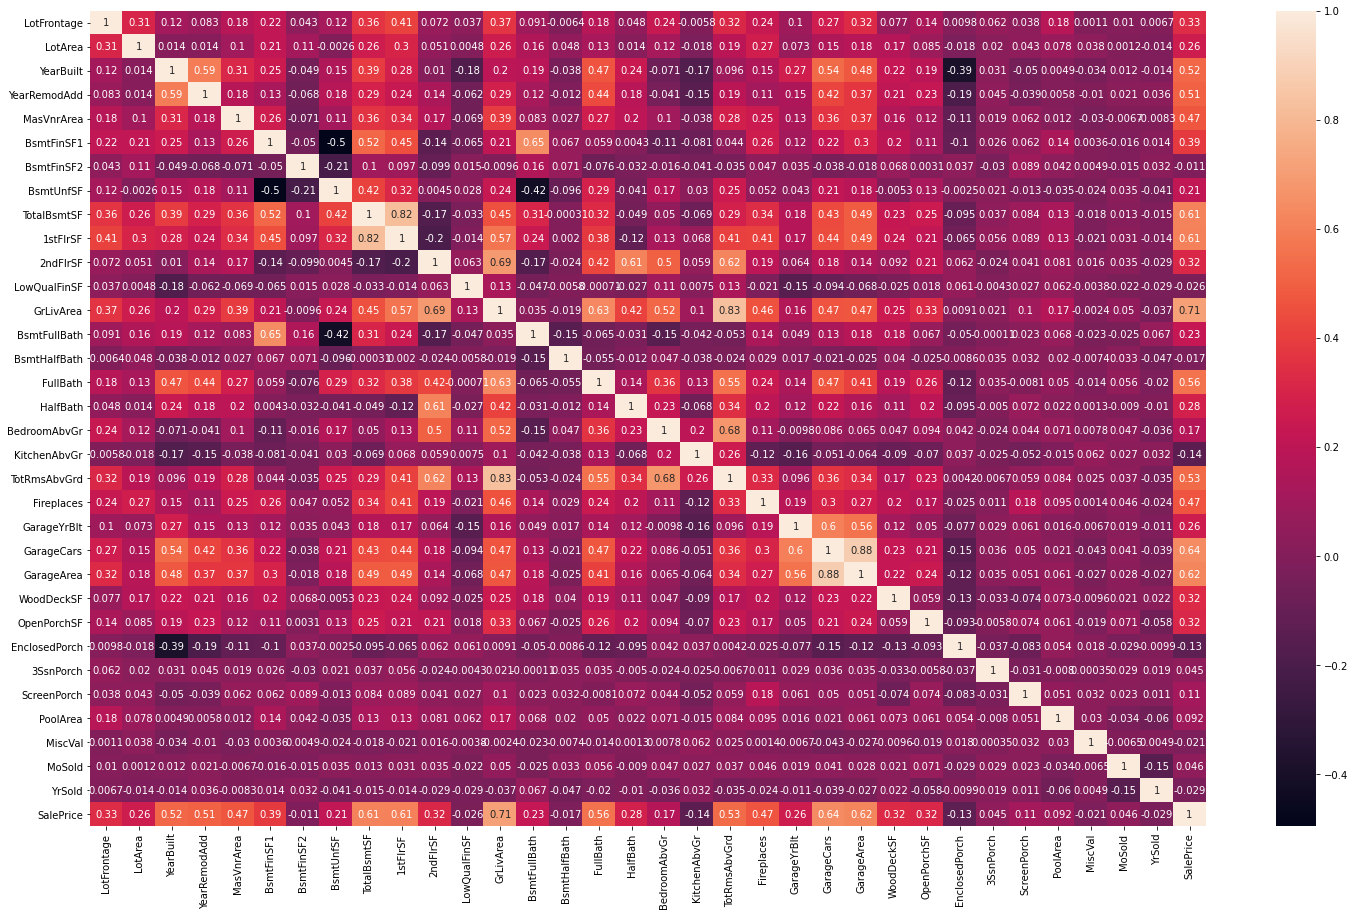

In [504]:
### Check the correlation of the different variables 

plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Inferences from the heatmap 
Sale price is highly correlated with OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea,GarageCars.
Along with these YearBuilt,YearRemodAdd,FullBath,TotRoomsAbovrGrnd also have  in determining the overall 

### Univariate Analysis 

In [505]:
## Numderic columns
df.select_dtypes(include=["number"]).columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [506]:
categorical = df.select_dtypes(include=['object']).columns
print(categorical)

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')


In [507]:

numeric_cols = [ 'LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'] 
    
time_cols = ['YearBuilt', 'YearRemodAdd','MoSold', 'YrSold','GarageYrBlt']

ordinal_cols = [ 'OverallQual', 'OverallCond', "ExterQual","ExterCond","BsmtQual",'BsmtCond','BsmtExposure',
                'BsmtFinType1', 'BsmtFinType2', 'HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual',
                'GarageCond','PavedDrive','PoolQC','Fence',
               ]

In [508]:
nominal_cols = list(set(categorical) - set(ordinal_cols))
print(nominal_cols)

['SaleType', 'RoofMatl', 'Exterior1st', 'Functional', 'Street', 'GarageType', 'Neighborhood', 'MSZoning', 'HouseStyle', 'Foundation', 'Condition2', 'Electrical', 'SaleCondition', 'LotConfig', 'LandContour', 'Alley', 'LandSlope', 'RoofStyle', 'BldgType', 'LotShape', 'Exterior2nd', 'MasVnrType', 'Heating', 'Utilities', 'MiscFeature', 'MSSubClass', 'CentralAir', 'Condition1']


In [509]:
len(nominal_cols)

28

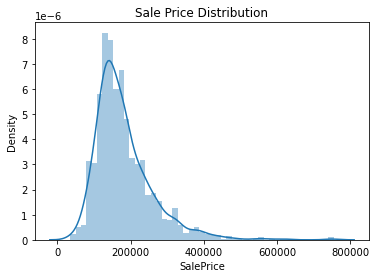

In [510]:
### SalePrice Distribution
plt.figure()
plt.title("Sale Price Distribution")
sns.distplot(df['SalePrice'])
plt.show()

### Inferences from SalePrice 
Most of the housing sales are in the range of $100k  to  $250k price tags , with some minimal transactions at above $600k value.

<Figure size 432x288 with 0 Axes>

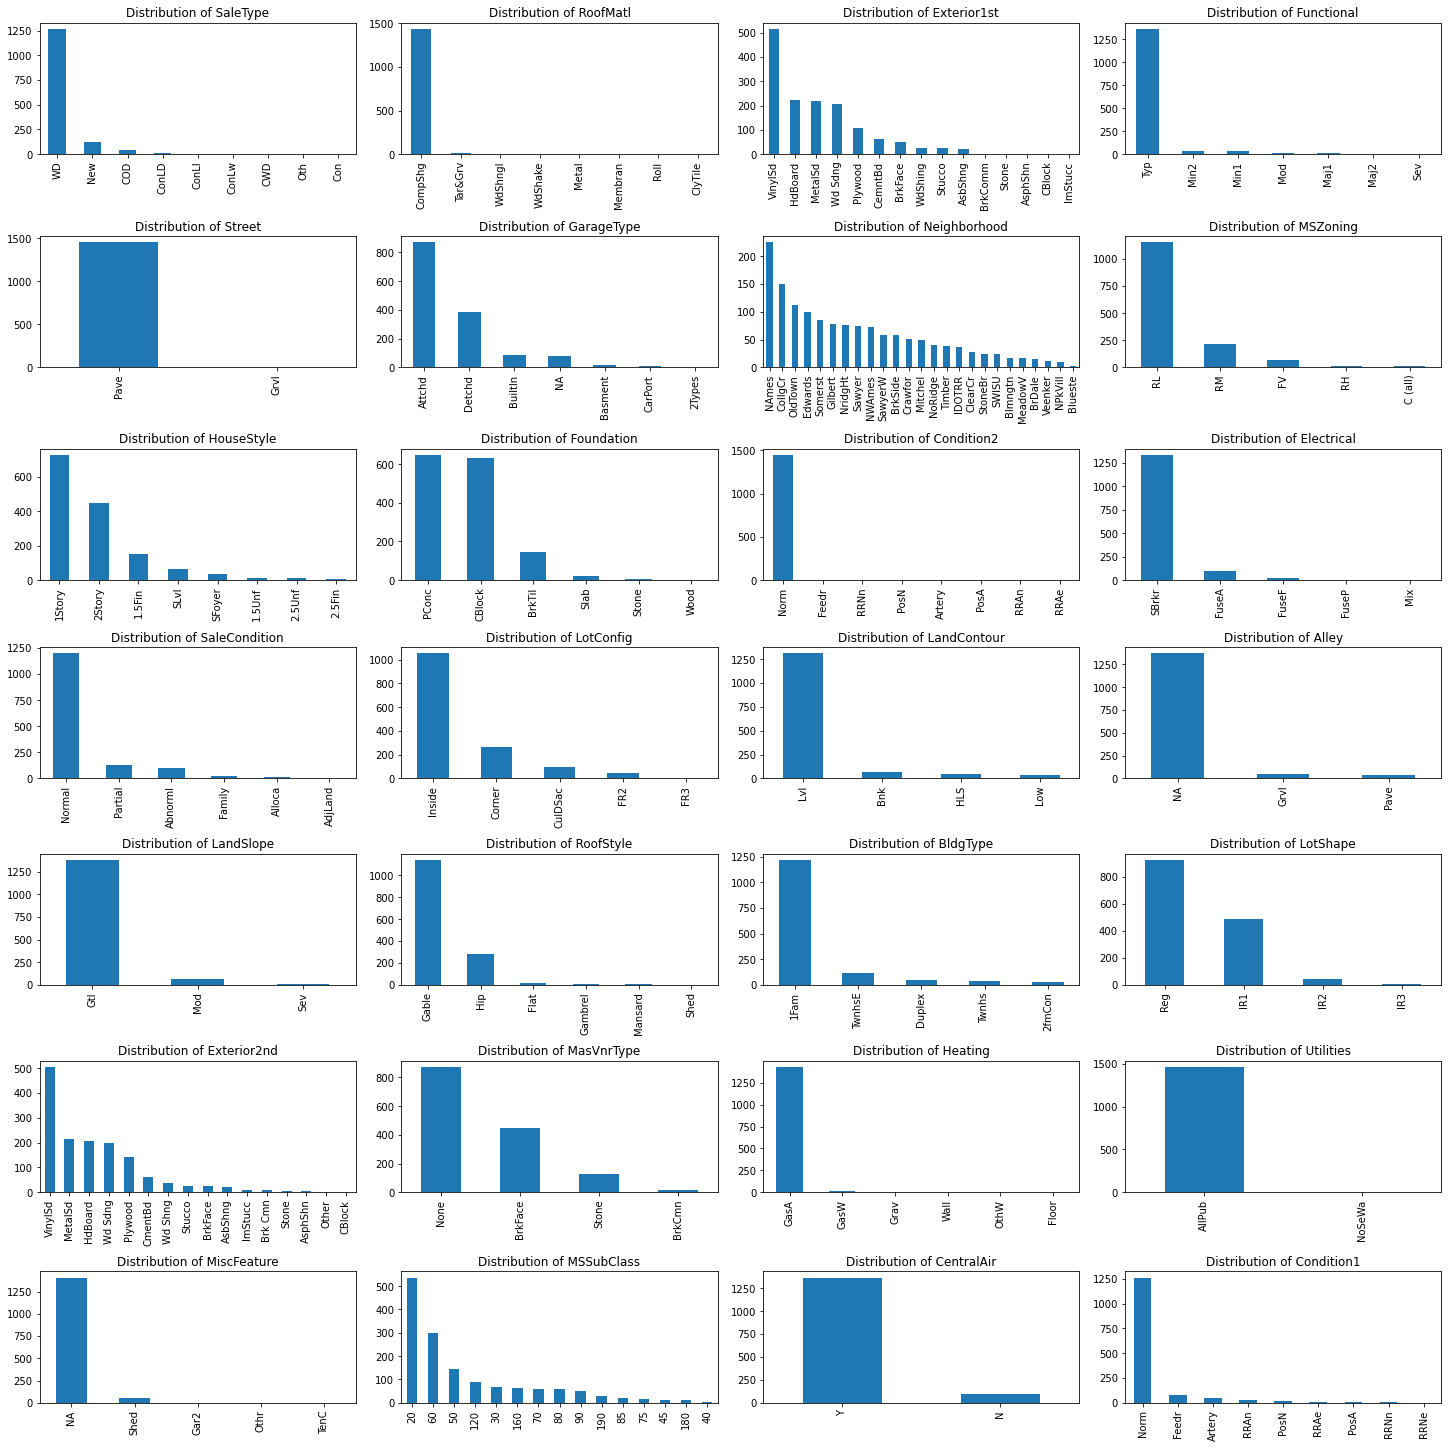

In [511]:
### Univariate Analysis 

rows = int(len(nominal_cols)/4)
plt.figure()
fig,axs = plt.subplots(rows,4,figsize=(20,20),constrained_layout=True)

for ax,col in zip(axs.flatten(),nominal_cols):
    df[col].value_counts().plot.bar(ax=ax)
    text = "Distribution of "+ str(col)
    ax.set_title(text)
    
plt.show()

<Figure size 432x288 with 0 Axes>

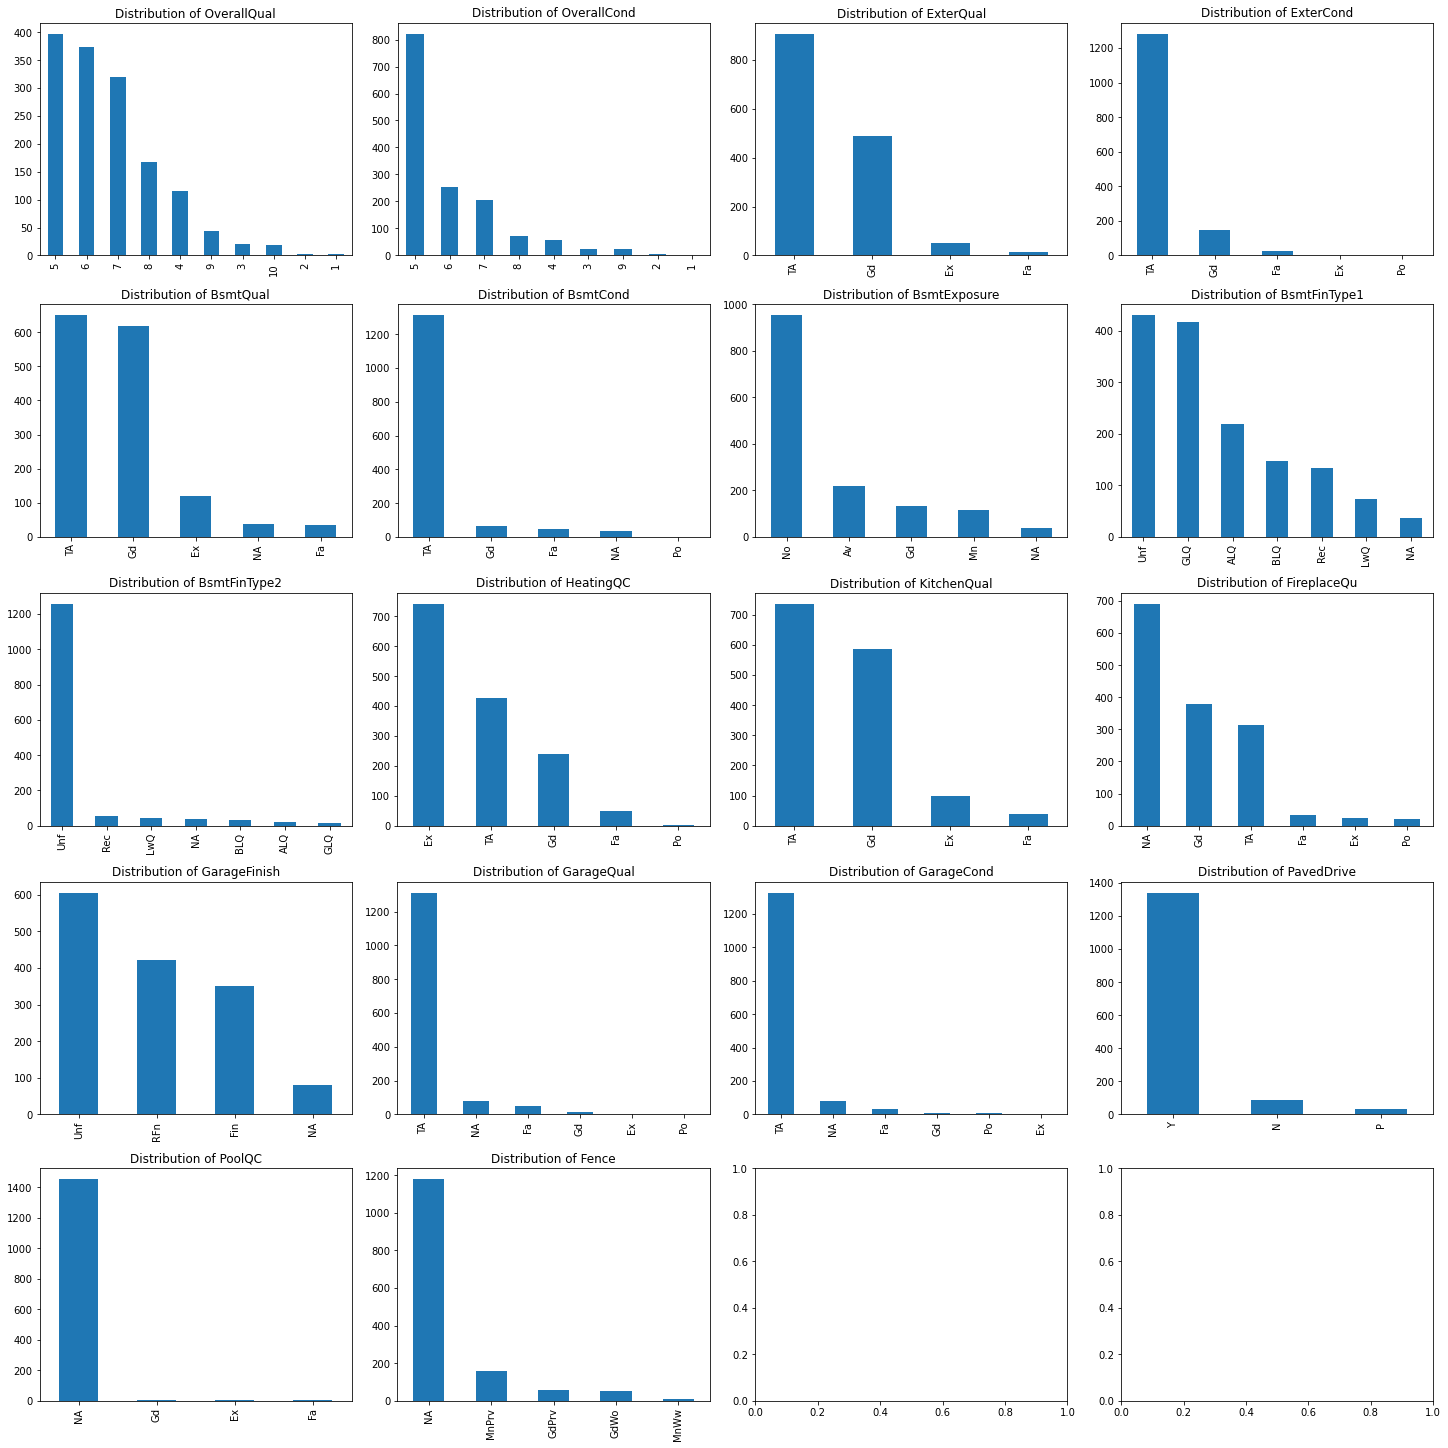

In [512]:
rows = int(len(ordinal_cols)/4)+1
plt.figure()
fig,axs = plt.subplots(rows,4,figsize=(20,20),constrained_layout=True)

for ax,col in zip(axs.flatten(),ordinal_cols):
    df[col].value_counts().plot.bar(ax=ax)
    text = "Distribution of "+ str(col)
    ax.set_title(text)
    
plt.show()

### Inferences 
Majority of houses does not have  Fence , Pool and also no Basement exposure for gardens. 
Also in most of the houses have average basement quality , garage condition , external quality and extenal condition. 

In [513]:
## Check the data distribution 
df[~df['SaleType'].isin(['WD','New','COD','ConLD'])]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
140,20,RL,70.0,10500,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,4,2010,ConLI,Normal,115000
144,90,RM,70.0,9100,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,11,2006,ConLI,Abnorml,125000
221,60,RL,70.0,8068,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,12,2009,ConLI,Normal,200000
253,80,RL,85.0,9350,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,MnPrv,NA,0,10,2007,CWD,Normal,158000
282,120,RL,34.0,5063,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,4,2009,ConLw,Normal,207500
326,120,RL,32.0,10846,Pave,NA,IR1,Lvl,AllPub,CulDSac,...,0,NA,NA,NA,0,5,2008,Con,Normal,324000
352,50,RL,60.0,9084,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,3,2008,ConLw,Normal,95000
435,60,RL,43.0,10667,Pave,NA,IR2,Lvl,AllPub,CulDSac,...,0,NA,NA,NA,0,4,2009,ConLw,Normal,212000
439,50,RL,67.0,12354,Pave,Grvl,Reg,Lvl,AllPub,Corner,...,0,NA,GdPrv,Shed,800,8,2009,ConLI,Normal,110000
591,60,RL,97.0,13478,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,6,2009,ConLI,Normal,451950


In [514]:
### Based on the "SaleType" distribution , we can see that 99% of data is explained by top 4 categories
### Dropping the rest of the 1% data 19 rows is significantly helping to reduce the dimension post dummy variable generation. 
### which helps to speed up the processing. 

df_new = df[df['SaleType'].isin(['WD','New','COD',"ConLD"])]

In [515]:
df_new.shape

(1441, 80)

In [516]:
## Drop any duplicate columns
df_new = df_new.drop_duplicates()

In [517]:
df_new.shape

(1441, 80)

<Figure size 432x288 with 0 Axes>

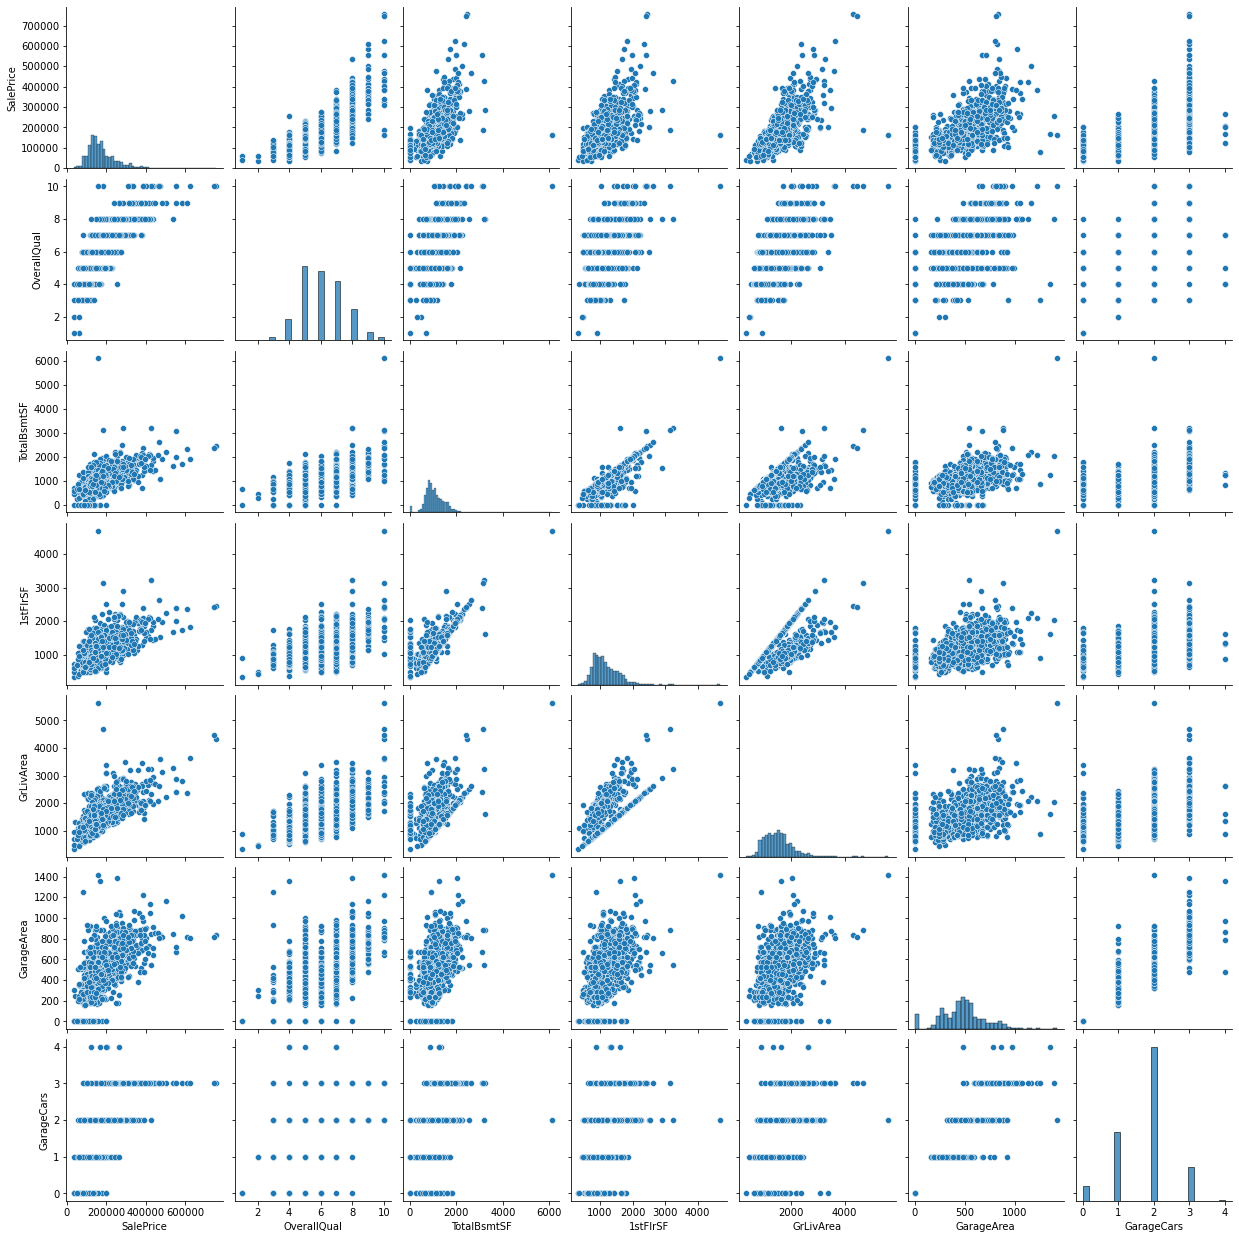

In [518]:
### Let us check the SalePrice distribution w.r.t to the highly correlated numberic variables 

highcorr_cols = ['SalePrice','OverallQual','TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea','GarageCars']

plt.figure()
sns.pairplot(df_new[highcorr_cols])
plt.show()

### Inferences 
SalePrice of couple of houses is on the lower side despite the GrLivArea,BasementArea and Garage area are on the higherside. This looks unusual as the SalePrice would be higher for houses with larger living , basement and garage area.
 
 

In [519]:
## Check that one tansactions with higher area but lower saleprice 
df_new[df_new['1stFlrSF']>4000][['GrLivArea','1stFlrSF','TotalBsmtSF','SalePrice']]

,GrLivArea,1stFlrSF,TotalBsmtSF,SalePrice
1298,5642,4692,6110,160000


In [520]:
## Drop the column with the outlier
df_new = df_new[df_new['1stFlrSF']<4000]

In [521]:
time_cols

['YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold', 'GarageYrBlt']

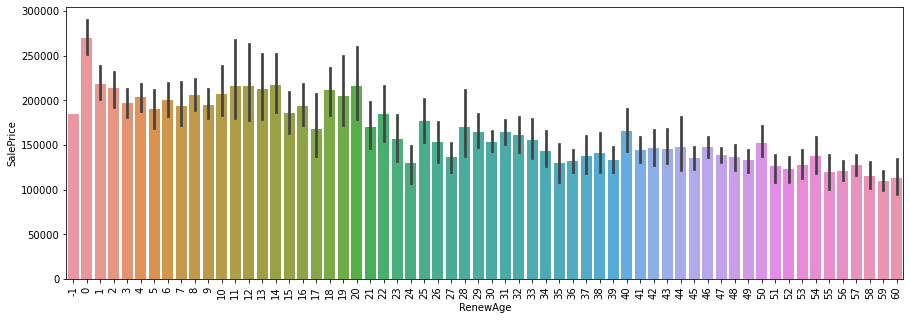

In [522]:
### Check SalePrice to renovation age
plt.figure(figsize=(15,5))
df_new['RenewAge']=df_new['YrSold']-df_new['YearRemodAdd']
sns.barplot(x='RenewAge',y='SalePrice',data=df_new)
plt.xticks(rotation=90)
plt.show()

In [523]:
df_new[df_new['YearRemodAdd'] > df_new['YrSold']][['YearBuilt','YearRemodAdd','YrSold','SalePrice']]

,YearBuilt,YearRemodAdd,YrSold,SalePrice
523,2007,2008,2007,184750


In [524]:
## Drop the above row where remodel year is greater than year sold.
df_new=df_new[df_new['YearRemodAdd'] <= df_new['YrSold']]

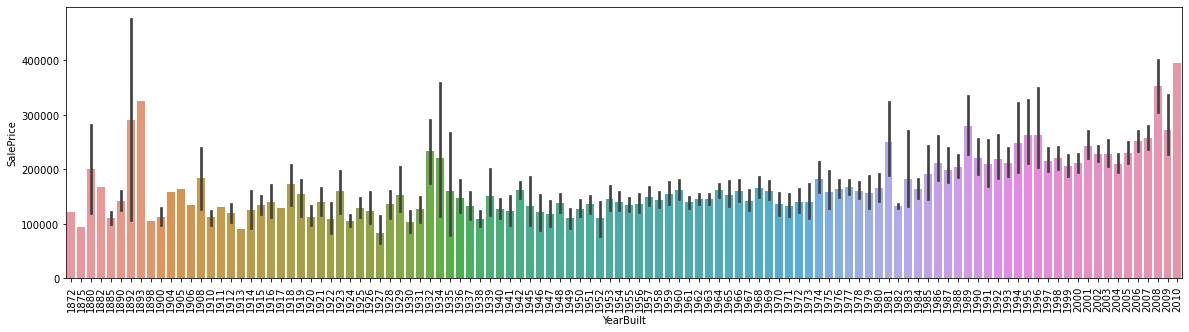

In [525]:
### Check the distribution of time columns 
plt.figure(figsize=(20,5))
sns.barplot(x='YearBuilt',y='SalePrice',data=df_new)
plt.xticks(rotation=90)
plt.show()

In [526]:
### Perform one-hot encoding for the Nomimal variables 

dummies = pd.get_dummies(df_new[nominal_cols],drop_first=True).sort_index()

df_new = pd.concat([df_new, dummies], axis=1)
df_new = df_new.drop(nominal_cols, axis=1)

df_new.info()
df_new.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1439 entries, 0 to 1459
Columns: 219 entries, LotFrontage to Condition1_RRNn
dtypes: float64(2), int32(1), int64(32), object(18), uint8(166)
memory usage: 867.0+ KB


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,MSSubClass_190,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn
0,65.0,8450,7,5,2003,2003,196.0,Gd,TA,Gd,...,0,1,0,1,0,0,0,0,0,0
1,80.0,9600,6,8,1976,1976,0.0,TA,TA,Gd,...,0,1,1,0,0,0,0,0,0,0
2,68.0,11250,7,5,2001,2002,162.0,Gd,TA,Gd,...,0,1,0,1,0,0,0,0,0,0
3,60.0,9550,7,5,1915,1970,0.0,TA,TA,TA,...,0,1,0,1,0,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,Gd,TA,Gd,...,0,1,0,1,0,0,0,0,0,0


In [527]:
ordinal_cols

['OverallQual',
 'OverallCond',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence']

In [528]:
### Perform Label Encoding on Ordinal variables 

ordinal_vals = { 
    
     'ExterQual' : { 'Po':0 , 'Fa':1,'TA':2, 'Gd':3, 'Ex':4 } ,
     'ExterCond' : { 'Po':0 , 'Fa':1,'TA':2, 'Gd':3, 'Ex':4 } ,
     'BsmtQual'  : { 'NA':0 , 'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5 },
      'BsmtCond' : { 'NA':0 , 'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5 },
     'BsmtExposure' : { 'NA':0 , 'No':1 , 'Mn':2, 'Av':3,'Gd':4 },
     'BsmtFinType1' : { 'NA':0 , 'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6},
     'BsmtFinType2' : { 'NA':0 , 'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6},
     'HeatingQC' :  { 'Po':0 , 'Fa':1,'TA':2, 'Gd':3, 'Ex':4 },
     'KitchenQual':  { 'Po':0 , 'Fa':1,'TA':2, 'Gd':3, 'Ex':4 },
     'FireplaceQu':  { 'NA':0 , 'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5 },
     'GarageFinish': {'NA':0,'Unf':1,'RFn':2,'Fin':3},
     'GarageQual' : { 'NA':0 , 'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5 },
     'GarageCond': { 'NA':0 , 'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5 },
     'PavedDrive': { 'N':0 , 'P':1, 'Y':2 },
     'PoolQC':  { 'NA':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
     'Fence': {'NA':0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4}
}


In [529]:
df_new.replace(to_replace=ordinal_vals,inplace=True)

df_new.info()
df_new.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1439 entries, 0 to 1459
Columns: 219 entries, LotFrontage to Condition1_RRNn
dtypes: float64(2), int32(1), int64(48), object(2), uint8(166)
memory usage: 867.0+ KB


(1439, 219)

In [530]:
## Convert the remaining two object category vars 'OverallQual','OverallCond' to int

df_new['OverallQual'] = df_new['OverallQual'].astype('int32')
df_new['OverallCond'] = df_new['OverallCond'].astype('int32')

In [531]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1439 entries, 0 to 1459
Columns: 219 entries, LotFrontage to Condition1_RRNn
dtypes: float64(2), int32(3), int64(48), uint8(166)
memory usage: 855.8 KB


In [532]:
### Handling the time_cols and deriving metrics meaningful for regression

df_new['HouseAge'] = df_new['YrSold'] - df_new['YearBuilt']
df_new['GarageAge'] = df_new['YrSold'] - df_new['GarageYrBlt']
df_new['RenewAge']= df_new['YrSold']-df_new['YearRemodAdd']
df_new.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold'],axis=1,inplace=True)

In [533]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1439 entries, 0 to 1459
Columns: 216 entries, LotFrontage to GarageAge
dtypes: float64(2), int32(2), int64(46), uint8(166)
memory usage: 827.7 KB


### Train and Test split 

In [534]:
### Train_test split 

housing_train, housing_test = train_test_split(df_new, train_size = 0.70, test_size = 0.30, random_state = 120)
print(housing_train.shape)
print(housing_test.shape)

(1007, 216)
(432, 216)


In [535]:
## Applying log transformation to take off the positive skewness from target variable.
y_train = housing_train.SalePrice
X_train = housing_train.drop("SalePrice",axis=1)

y_test= housing_test.SalePrice
X_test = housing_test.drop("SalePrice",axis=1)

In [536]:
numeric_vars=X_train.select_dtypes(include=['int64','float64','int32']).columns

In [537]:
numeric_vars

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscVal', 'RenewAge', 'HouseAge', 'GarageAge'],
      dtype='object')

In [538]:
### Apply Standard scalar 
scaler = StandardScaler()
X_train[numeric_vars] = scaler.fit_transform(X_train[numeric_vars])
X_test[numeric_vars]= scaler.transform(X_test[numeric_vars])

### Model Selection 

In [539]:
### Perform RFE and select the top ranked features

lm=LinearRegression()
lm.fit(X_train,y_train)

selector = RFE(lm,20)
selector= selector.fit(X_train,y_train)

cols1 = X_train.columns[selector.support_]

In [540]:
a = list(zip(X_train.columns[selector.support_],selector.ranking_))

df_sub = pd.DataFrame(a,columns=["Features","Ranks"])  
df_sub.sort_values(by="Ranks")


,Features,Ranks
17,Heating_OthW,1
2,2ndFlrSF,1
18,MSSubClass_160,1
15,BldgType_Duplex,2
14,Foundation_Wood,4
11,Neighborhood_NridgHt,6
19,MSSubClass_190,7
13,MSZoning_FV,10
9,Functional_Sev,70
3,GrLivArea,73


In [541]:

### Check R2 score with stats model 
X_train_sm1 = X_train[cols1]

# Add constant intercept 
X_train_sm1 = sm.add_constant(X_train_sm1)

## Fit the model 
lr = sm.OLS(y_train, X_train_sm1).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     245.7
Date:                Wed, 13 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:41:06   Log-Likelihood:                -11910.
No. Observations:                1007   AIC:                         2.386e+04
Df Residuals:                     986   BIC:                         2.396e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.499e+05   4418.774     33.922      0.000    1.41e+05    1.59e+05
OverallQual           2.623e+04   1654.139     15.857      0.000     2.3e+04    2.95e+04
1stFlrSF              7.117e+04   9198.280      7.737      0.000    5.31e+04    8.92e+04
2ndFlrSF              6.358e+04   1.07e+04      5.938      0.000    4.26e+04    8.46e+04
GrLivArea             -4.28e+04   1.24e+04     -3.440      0.001   -6.72e+04   -1.84e+04
RoofMatl_Membran      7.386e+04   3.38e+04      2.184      0.029    7490.349     1.4e+05
RoofMatl_WdShngl      1.728e+05   2.02e+04      8.546      0.000    1.33e+05    2.13e+05
Exterior1st_BrkComm  -6.073e+04   3.37e+04     -1.800      0.072   -1.27e+05    5480.277
Exterior1st_ImStucc  -3.227e+04   3.58e+04     -0.900      0.368   -1.03e+05    3.81e+04
Exterior1st_Stone    -9.578e+04    3.4e+04     -2.816      0.005   -1.63e+05    -2.9e+04
Functional_Sev       -8.914e+04   3.38e+04     -2.639      0.008   -1.55e+05   -2.28e+04
Functional_Typ        2.985e+04   4548.791      6.561      0.000    2.09e+04    3.88e+04
Neighborhood_NridgHt  5.507e+04   5519.713      9.978      0.000    4.42e+04    6.59e+04
Neighborhood_StoneBr   4.91e+04   8506.889      5.771      0.000    3.24e+04    6.58e+04
MSZoning_FV           2.149e+04   5736.663      3.747      0.000    1.02e+04    3.28e+04
Foundation_Wood      -4.099e+04   2.38e+04     -1.724      0.085   -8.76e+04    5657.857
BldgType_Duplex      -3.253e+04   6113.569     -5.321      0.000   -4.45e+04   -2.05e+04
Exterior2nd_ImStucc   4.973e+04   1.28e+04      3.886      0.000    2.46e+04    7.48e+04
Heating_OthW         -9.575e+04   2.39e+04     -4.010      0.000   -1.43e+05   -4.89e+04
MSSubClass_160       -1.773e+04   5721.441     -3.099      0.002    -2.9e+04   -6505.318
MSSubClass_190       -2.718e+04   7379.808     -3.683      0.000   -4.17e+04   -1.27e+04
==============================================================================
Omnibus:                      194.985   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1065.446
Skew:                           0.770   Prob(JB):                    4.38e-232
Kurtosis:                       7.798   Cond. No.                         52.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 2 

In [542]:
### We see only one variable with Rank 1  in Model 1 , when tested with RFE as 20. Going for RFE as 50 

lm2=LinearRegression()
lm2.fit(X_train,y_train)

selector = RFE(lm2,50)
selector= selector.fit(X_train,y_train)

cols = X_train.columns[selector.support_]

In [543]:
a = list(zip(X_train.columns[selector.support_],selector.ranking_))
df_sub = pd.DataFrame(a,columns=["Features","Ranks"])  
df_sub.sort_values(by="Ranks")

,Features,Ranks
15,Exterior1st_CBlock,1
17,Exterior1st_Stone,1
20,Functional_Typ,1
14,Exterior1st_BrkComm,1
13,RoofMatl_WdShngl,1
11,RoofMatl_Metal,1
18,Functional_Mod,1
48,MSSubClass_190,1
19,Functional_Sev,1
2,BsmtFinSF2,1


#### We now have top 10 features with rank1 . Let us proceed to check the R2 score of the model 

In [544]:

### Check R2 score with stats model 
X_train_sm = X_train[cols]

# Add constant intercept 
X_train_sm = sm.add_constant(X_train_sm)

## Fit the model 
lr2 = sm.OLS(y_train, X_train_sm).fit()

lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     175.0
Date:                Wed, 13 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:41:07   Log-Likelihood:                -11725.
No. Observations:                1007   AIC:                         2.354e+04
Df Residuals:                     964   BIC:                         2.375e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.285e+05   1.02e+04     12.599      0.000    1.08e+05    1.48e+05
OverallQual           2.233e+04   1470.771     15.184      0.000    1.94e+04    2.52e+04
BsmtFinSF1            1.154e+04    851.757     13.551      0.000    9871.040    1.32e+04
BsmtFinSF2            2206.3596    907.290      2.432      0.015     425.869    3986.850
BsmtUnfSF            -1869.6568    820.215     -2.279      0.023   -3479.269    -260.045
TotalBsmtSF            1.11e+04   1400.226      7.928      0.000    8353.159    1.38e+04
1stFlrSF              1.195e+04   1473.262      8.114      0.000    9063.491    1.48e+04
2ndFlrSF              1.308e+04    860.684     15.197      0.000    1.14e+04    1.48e+04
LowQualFinSF         -2567.0113   1045.199     -2.456      0.014   -4618.140    -515.883
GrLivArea             1.938e+04    839.652     23.079      0.000    1.77e+04     2.1e+04
SaleType_New          2.934e+04   3657.478      8.022      0.000    2.22e+04    3.65e+04
RoofMatl_Membran      7.534e+04   3.05e+04      2.472      0.014    1.55e+04    1.35e+05
RoofMatl_Metal        2.517e+04   2.83e+04      0.891      0.373   -3.03e+04    8.06e+04
RoofMatl_Roll        -1.465e-10   1.05e-10     -1.391      0.164   -3.53e-10    6.01e-11
RoofMatl_WdShngl      1.662e+05   1.73e+04      9.589      0.000    1.32e+05       2e+05
Exterior1st_BrkComm   -3.97e+04   2.98e+04     -1.332      0.183   -9.82e+04    1.88e+04
Exterior1st_CBlock    1.108e-11   4.74e-11      0.234      0.815    -8.2e-11    1.04e-10
Exterior1st_ImStucc  -7.262e+04   3.06e+04     -2.374      0.018   -1.33e+05   -1.26e+04
Exterior1st_Stone    -6.124e+04   2.92e+04     -2.095      0.036   -1.19e+05   -3885.454
Functional_Mod       -1.491e+04   1.03e+04     -1.446      0.149   -3.52e+04    5327.242
Functional_Sev       -8.954e+04   2.88e+04     -3.113      0.002   -1.46e+05   -3.31e+04
Functional_Typ        2.325e+04   4230.284      5.496      0.000    1.49e+04    3.15e+04
Neighborhood_NWAmes  -1.482e+04   4398.040     -3.369      0.001   -2.34e+04   -6187.931
Neighborhood_NoRidge  4.074e+04   6547.930      6.221      0.000    2.79e+04    5.36e+04
Neighborhood_NridgHt  4.548e+04   4951.073      9.186      0.000    3.58e+04    5.52e+04
Neighborhood_StoneBr  4.107e+04   7247.489      5.666      0.000    2.68e+04    5.53e+04
MSZoning_FV           4.261e+04   1.05e+04      4.042      0.000    2.19e+04    6.33e+04
MSZoning_RH           1.405e+04   1.22e+04      1.152      0.250   -9892.678     3.8e+04
MSZoning_RL           2.766e+04   9250.896      2.990      0.003    9504.068    4.58e+04
MSZoning_RM           1.945e+04   9440.920      2.061      0.040     926.727     3.8e+04
Foundation_Slab       2.534e+04   1.02e+04      2.489      0.013    5364.056    4.53e+04
Foundation_Wood       -4.49e+04   2.01e+04     -2.232    

In [545]:
### Applying Ridge Regression 

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [546]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 20}
-18774.362967287314


In [547]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

print(ridge.intercept_)
print(ridge.coef_)

145270.20305171213
[ 2.98112573e+03  3.97824005e+03  1.30100862e+04  7.61217232e+03
  6.67546907e+03  4.47996507e+03 -1.83922674e+03  3.37309074e+03
 -4.69958984e+03  5.95476855e+03  5.94910625e+02  8.76103703e+03
  1.36631160e+02  1.33512775e+03  1.51388094e+02  9.98301576e+03
  1.20898004e+03  8.38845891e+03  1.31270636e+04 -1.29128576e+03
  1.69625836e+04  1.75925723e+02 -5.63783309e+02  6.60201962e+02
  1.32710045e+03 -5.70516358e+03 -4.40230896e+03  5.34105946e+03
  3.69061367e+03  3.42456872e+03 -3.37253010e+03 -7.07278503e+02
  4.60802224e+03  1.01040923e+03  5.59787053e+03 -2.70099808e+03
  3.88444881e+02  2.14649848e+03  1.28508535e+03 -6.02278965e+02
  4.32664687e+02  1.85126908e+03  1.86349636e+01  4.14421501e+03
 -2.01569772e+02  3.61177511e+02  8.44903693e+02  5.07822863e+02
  1.01425183e+04 -2.48136521e+03  1.97153484e+03  7.00162785e+02
  0.00000000e+00 -4.64619815e+03 -1.50099283e+03  1.44873113e+04
 -5.03493470e+02 -1.88317163e+03  7.49731082e+03  0.00000000e+00
  1.40

In [548]:
### Let us calculate the R2 score 
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

r2_train_rg = r2_score(y_train, y_pred_train)
print(r2_train_rg)

r2_test_rg = r2_score(y_test, y_pred_test)
print(r2_test_rg)

0.9156331911500057
0.9093840398316344



### Lasso Regression


In [549]:
import warnings
warnings.filterwarnings('ignore')

lasso = Lasso(tol=1e-2)

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


# cross validation
folds=5
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv1.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Lasso(tol=0.01),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [550]:
print(model_cv1.best_params_)
print(model_cv1.best_score_)

{'alpha': 100}
-18427.629868663957


In [551]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
print(lasso.intercept_)
print(lasso.coef_)

134960.06870542114
[ 2.91922574e+03  3.21559725e+03  1.14288969e+04  7.50379780e+03
  5.34588121e+03  3.76907841e+03 -1.80951626e+03  2.21471469e+03
 -3.56404570e+03  5.41245016e+03  1.01122116e+03  8.14154225e+03
  5.21395106e+02  1.09195684e+03 -0.00000000e+00  1.00427590e+04
  8.46115988e+02  0.00000000e+00  2.28309847e+03 -3.09211913e+03
  2.88556674e+04  0.00000000e+00 -5.11173391e+02  8.65922349e+02
  8.46477375e+02 -5.42363314e+03 -4.61739895e+03  4.99419355e+03
  3.83080627e+03  2.98018035e+03 -2.79413879e+03 -2.53702505e+02
  4.56431898e+03  5.76218928e+02  2.16191061e+03 -0.00000000e+00
  1.22261849e+02  1.45593860e+03  1.20738028e+03 -5.79863498e+02
  2.74211380e+02  1.58519096e+03 -0.00000000e+00  4.43698983e+03
 -0.00000000e+00  2.79149269e+02  1.80584590e+02  0.00000000e+00
  2.33325612e+04 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -4.21247867e+02 -0.00000000e+00  1.01699885e+05
 -0.00000000e+00 -0.00000000e+00  1.24261129e+04  0.00000000e+00
  0.00

In [552]:
### Let us calculate R2 score 

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)


r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)


0.9214119243615567
0.8981279887100522
